   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0
class
0    762
1    610
Name: count, dtype: int64


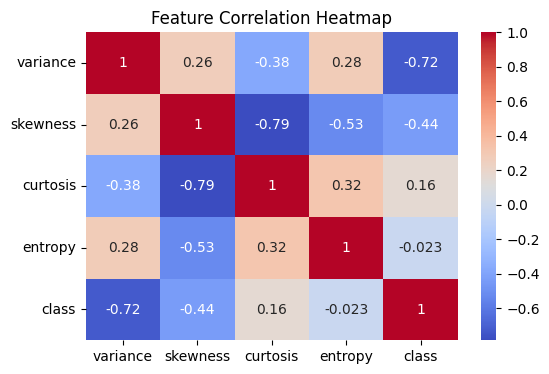

Decision Tree Accuracy: 0.944
Cross-validation Accuracy: 0.955


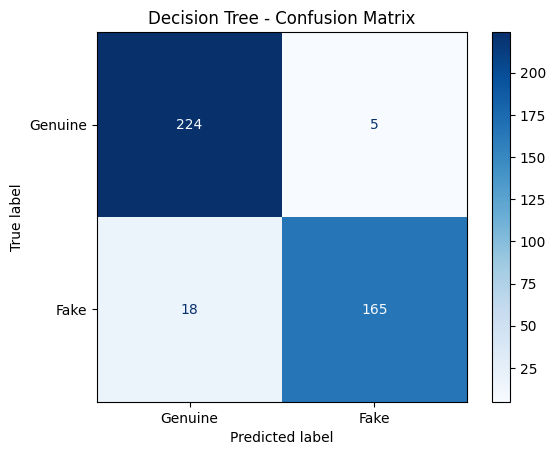

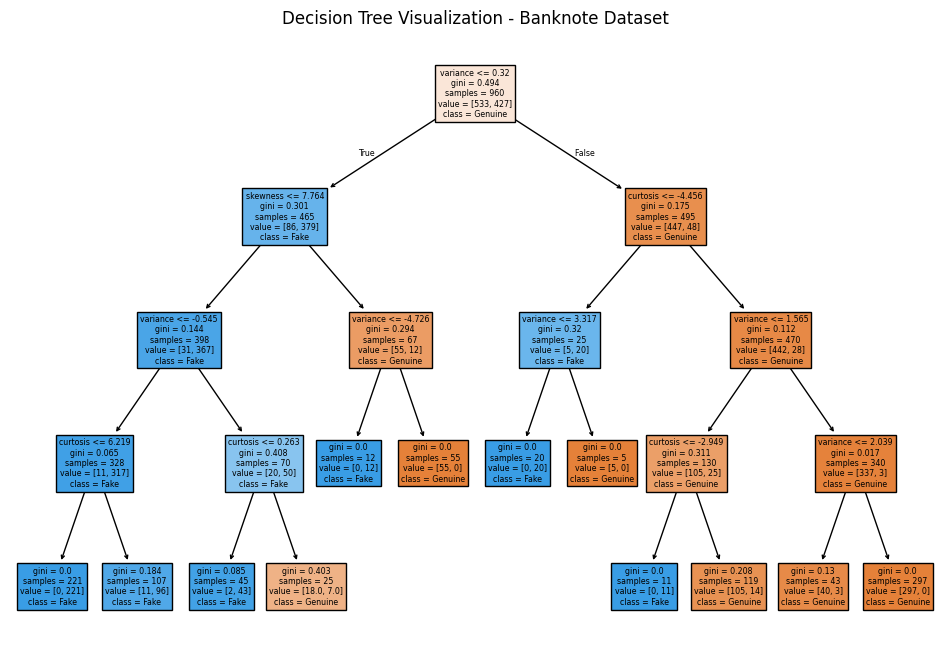

In [1]:
# Decision Tree Classifier - Banknote Authentication Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
df = pd.read_csv('data/data_banknote_authentication.csv', header=None)
df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

# Explore data
print(df.head())
print(df['class'].value_counts())

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Define features and target
X = df.drop('class', axis=1)
y = df['class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build Decision Tree model
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
cv = cross_val_score(dt, X, y, cv=5).mean()

print(f"Decision Tree Accuracy: {acc:.3f}")
print(f"Cross-validation Accuracy: {cv:.3f}")

# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Genuine', 'Fake']).plot(cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.show()

# Visualize Decision Tree
plt.figure(figsize=(12,8))
plot_tree(dt, feature_names=X.columns, class_names=['Genuine','Fake'], filled=True)
plt.title("Decision Tree Visualization - Banknote Dataset")
plt.show()
